In [1]:
import numpy as np
import pandas as pd

%matplotlib inline 
import matplotlib.pyplot as plt 

import sqlite3

import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

The next cell is needed to import our own modules into the notebook ...

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from dataset.db_query import *

In [4]:
conn = sqlite3.connect("../data/database.sqlite")

In [10]:
df = pd.read_sql_query("SELECT B365H, B365D, B365A FROM Match", conn)


In [20]:
tmp = df.idxmin(axis=1, skipna=True)

hn, dn, an = 0, 0, 0

for r in tmp:
    if r == "B365H":
        hn += 1
    if r == "B365D":
        dn += 1
    if r == "B365A":
        an += 1

In [21]:
print(hn, dn, an)

16408 30 6154


In [19]:
df

,B365H,B365D,B365A
0,1.73,3.40,5.00
1,1.95,3.20,3.60
2,2.38,3.30,2.75
3,1.44,3.75,7.50
4,5.00,3.50,1.65
5,4.75,3.40,1.67
6,2.10,3.20,3.30
7,3.20,3.40,2.20
8,2.25,3.25,2.88
9,1.30,5.25,9.50


Load all matches of the Bundesliga 2013/2014 season

In [5]:
bl13_14 = query_matches(conn, LeagueTag.GER, SeasonTag.S13_14)

INFO:root:got 306 rows (league: GER (id 7809), season: 2013/2014) from db


In [6]:
bl13_14.head()

,id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,9339,7809,7809,2013/2014,2013-08-09 00:00:00,1478940,9823,9788,3,1,...,114025,40735,114044,27412,269788,207236,192625,25819,38398,58346
1,9340,7809,7809,2013/2014,2013-08-11 00:00:00,1478943,9905,10269,3,2,...,97734,36146,246571,157252,27324,38842,27234,212892,58351,36084
2,9341,7809,7809,2013/2014,2013-08-10 00:00:00,1478944,8226,8165,2,2,...,36035,40093,24167,27436,425962,27349,115847,97752,212875,177720
3,9342,7809,7809,2013/2014,2013-08-11 00:00:00,1478945,10189,9790,3,3,...,141113,177715,27461,30987,141699,178781,178784,30840,187666,304733
4,9343,7809,7809,2013/2014,2013-08-10 00:00:00,1478946,8178,8358,3,1,...,240837,303912,147614,303913,42119,36771,159594,343797,30854,132844


Query all teams in the database

In [7]:
teams = query_teams(conn)

INFO:root:got 1458 rows from db


Find out what id Bayern has

In [8]:
collect_team_names(bl13_14, teams)

{9788: 'Borussia Mönchengladbach',
 9823: 'FC Bayern Munich',
 10269: 'VfB Stuttgart',
 9905: '1. FSV Mainz 05',
 8165: '1. FC Nürnberg',
 8226: 'TSG 1899 Hoffenheim',
 9790: 'Hamburger SV',
 10189: 'FC Schalke 04',
 8358: 'SC Freiburg',
 8178: 'Bayer 04 Leverkusen',
 8721: 'VfL Wolfsburg',
 9904: 'Hannover 96',
 9789: 'Borussia Dortmund',
 8406: 'FC Augsburg',
 8697: 'SV Werder Bremen',
 9776: 'Eintracht Braunschweig',
 9810: 'Eintracht Frankfurt',
 8177: 'Hertha BSC Berlin'}

Lets see how this season went for Bayern

In [9]:
bayern_season = bl13_14[(bl13_14.home_team_api_id == 9823) | (bl13_14.away_team_api_id == 9823)]

In [10]:
def bayerns_result(home_goals, away_goals, home_team_id):
    home_match = True if home_team_id == 9823 else False
    
    if home_goals > away_goals:
        if home_match: 
            return +1 
        else:
            return -1 
    if home_goals == away_goals:
        return 0
    if home_goals < away_goals:
        if home_match:
            return -1
        else:
            return +1 

# we add a result column here into the DataFrame

bayern_season = bayern_season.assign(result=np.vectorize(bayerns_result)(
    bayern_season['home_team_goal'], 
    bayern_season['away_team_goal'], 
    bayern_season['home_team_api_id'])
)


n_wins = bayern_season[bayern_season.result == 1].shape[0]
n_draws = bayern_season[bayern_season.result == 0].shape[0]
n_loss = bayern_season[bayern_season.result == -1].shape[0]


print("bayern wins {}; draws {}; losses {}".format(n_wins, n_draws, n_loss))

bayern wins 29; draws 3; losses 2


Ok this looks fine ... equals the stats on https://de.wikipedia.org/wiki/Fu%C3%9Fball-Bundesliga_2013/14

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/marius/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


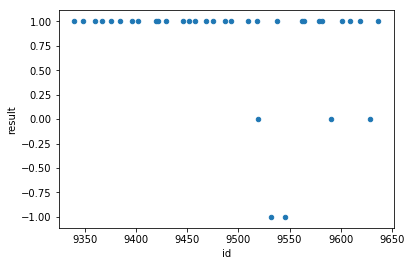

In [11]:
bayern_season.plot.scatter(x='id', y='result')

In [11]:
player = query_player(conn, 303912, pd.datetime.today())

INFO:root:got 31 rows from db


In [16]:
player

(0, date                   2016-02-04 00:00:00
 player_fifa_api_id                  207862
 player_api_id                       303912
 player_name                Matthias Ginter
 overall_rating                          76
 potential                               82
 attacking_work_rate                 medium
 defensive_work_rate                 medium
 crossing                                73
 finishing                               51
 heading_accuracy                        82
 short_passing                           77
 volleys                                 54
 dribbling                               63
 curve                                   58
 free_kick_accuracy                      52
 long_passing                            74
 ball_control                            72
 acceleration                            58
 sprint_speed                            67
 agility                                 59
 reactions                               78
 balance                     

In [14]:
ap_ids, hp_ids = get_player_ids_from_match(bl13_14, 0)

In [15]:
away_team_dict = query_multiple_players(conn, ap_ids)
home_team_dict = query_multiple_players(conn, hp_ids)

INFO:root:got 23 rows from db
INFO:root:got 23 rows from db
INFO:root:got 22 rows from db
INFO:root:got 22 rows from db
INFO:root:got 21 rows from db
INFO:root:got 33 rows from db
INFO:root:got 32 rows from db
INFO:root:got 28 rows from db
INFO:root:got 32 rows from db
INFO:root:got 30 rows from db
INFO:root:got 31 rows from db
INFO:root:got 29 rows from db
INFO:root:got 30 rows from db
INFO:root:got 33 rows from db
INFO:root:got 30 rows from db
INFO:root:got 33 rows from db
INFO:root:got 26 rows from db
INFO:root:got 25 rows from db
INFO:root:got 29 rows from db
INFO:root:got 29 rows from db
INFO:root:got 24 rows from db
INFO:root:got 32 rows from db


In [16]:
get_player_names(away_team_dict)

{184554: 'Marc-Andre ter Stegen',
 114025: 'Tony Jantschke',
 40735: 'Martin Stranzl',
 114044: 'Alvaro Dominguez',
 27412: 'Filip Daems',
 269788: 'Christoph Kramer',
 207236: 'Granit Xhaka',
 192625: 'Patrick Herrmann',
 25819: 'Raffael',
 38398: 'Juan Arango',
 58346: 'Max Kruse'}

In [17]:
get_player_names(home_team_dict)

{27299: 'Manuel Neuer',
 30894: 'Philipp Lahm',
 36183: 'Jerome Boateng',
 38432: 'Dante',
 121633: 'David Alaba',
 30872: 'Bastian Schweinsteiger',
 30834: 'Arjen Robben',
 116772: 'Thomas Mueller',
 95078: 'Toni Kroos',
 30924: 'Franck Ribery',
 75447: 'Mario Mandzukic'}

We get a time series for every player, e.g. Thomas Müller ...

In [18]:
thomas_mueller = home_team_dict[116772]
thomas_mueller.head()

,player_fifa_api_id,player_api_id,player_name,date,overall_rating,potential,attacking_work_rate,defensive_work_rate,crossing,finishing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,birthday
0,189596,116772,Thomas Mueller,2016-05-12 00:00:00,86,88,high,high,79,89,...,82,32,41,44,6,7,11,14,14,1989-09-13 00:00:00
1,189596,116772,Thomas Mueller,2016-04-28 00:00:00,86,88,high,high,79,89,...,90,32,41,44,6,7,11,14,14,1989-09-13 00:00:00
2,189596,116772,Thomas Mueller,2016-01-14 00:00:00,86,88,high,high,79,89,...,90,32,41,44,6,7,11,14,14,1989-09-13 00:00:00
3,189596,116772,Thomas Mueller,2015-10-23 00:00:00,86,88,high,high,79,89,...,90,32,41,44,6,7,11,14,14,1989-09-13 00:00:00
4,189596,116772,Thomas Mueller,2015-09-21 00:00:00,86,88,high,high,79,89,...,90,32,41,44,6,7,11,14,14,1989-09-13 00:00:00


... with multiple stats for each entry ...

In [19]:
thomas_mueller.dtypes

player_fifa_api_id      int64
player_api_id           int64
player_name            object
date                   object
overall_rating          int64
potential               int64
attacking_work_rate    object
defensive_work_rate    object
crossing                int64
finishing               int64
heading_accuracy        int64
short_passing           int64
volleys                 int64
dribbling               int64
curve                   int64
free_kick_accuracy      int64
long_passing            int64
ball_control            int64
acceleration            int64
sprint_speed            int64
agility                 int64
reactions               int64
balance                 int64
shot_power              int64
jumping                 int64
stamina                 int64
strength                int64
long_shots              int64
aggression              int64
interceptions           int64
positioning             int64
vision                  int64
penalties               int64
marking   

... most of them are numeric which should be good for DL, also for this player at least there a no NULL entries ...

In [20]:
thomas_mueller.isnull().sum()

player_fifa_api_id     0
player_api_id          0
player_name            0
date                   0
overall_rating         0
potential              0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


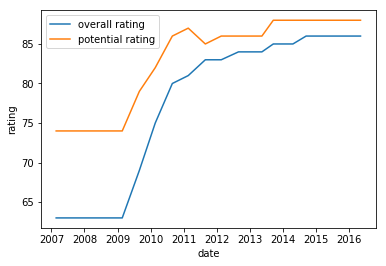

In [21]:
time = pd.to_datetime(thomas_mueller['date'], format='%Y-%m-%d %H:%M:%S.%f')

plt.plot(time, thomas_mueller.overall_rating)
plt.plot(time, thomas_mueller.potential)
plt.legend(["overall rating", "potential rating"])

plt.ylabel("rating")
plt.xlabel("date")

plt.show()

In [22]:
thomas_mueller.loc[0]

player_fifa_api_id                  189596
player_api_id                       116772
player_name                 Thomas Mueller
date                   2016-05-12 00:00:00
overall_rating                          86
potential                               88
attacking_work_rate                   high
defensive_work_rate                   high
crossing                                79
finishing                               89
heading_accuracy                        82
short_passing                           83
volleys                                 83
dribbling                               78
curve                                   81
free_kick_accuracy                      59
long_passing                            77
ball_control                            81
acceleration                            76
sprint_speed                            78
agility                                 77
reactions                               91
balance                                 73
shot_power 

In [80]:
tar

Timestamp('2013-06-23 00:00:00')

In [85]:
(bl13_14.date - tar).min()

Timedelta('47 days 00:00:00')

In [89]:
bl13_14.sort_values(by="date")

,id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,9339,7809,7809,2013/2014,2013-08-09,1478940,9823,9788,3,1,...,114025,40735,114044,27412,269788,207236,192625,25819,38398,58346
7,9346,7809,7809,2013/2014,2013-08-10,1478949,9776,8697,0,1,...,35989,41927,154245,107588,164259,27512,42860,107920,27316,141396
6,9345,7809,7809,2013/2014,2013-08-10,1478948,8406,9789,0,4,...,94652,71399,36388,94685,37374,27365,150565,178818,129944,93447
5,9344,7809,7809,2013/2014,2013-08-10,1478947,9904,8721,2,0,...,27774,28480,178206,115591,201888,30949,40193,298915,31235,30764
8,9347,7809,7809,2013/2014,2013-08-10,1478950,8177,9810,6,1,...,167065,106309,27475,155534,34267,141370,37087,27478,27352,172321
2,9341,7809,7809,2013/2014,2013-08-10,1478944,8226,8165,2,2,...,36035,40093,24167,27436,425962,27349,115847,97752,212875,177720
4,9343,7809,7809,2013/2014,2013-08-10,1478946,8178,8358,3,1,...,240837,303912,147614,303913,42119,36771,159594,343797,30854,132844
3,9342,7809,7809,2013/2014,2013-08-11,1478945,10189,9790,3,3,...,141113,177715,27461,30987,141699,178781,178784,30840,187666,304733
1,9340,7809,7809,2013/2014,2013-08-11,1478943,9905,10269,3,2,...,97734,36146,246571,157252,27324,38842,27234,212892,58351,36084
107,9446,7809,7809,2013/2014,2013-08-17,1479007,9810,9823,0,1,...,30894,36183,38432,121633,30872,176300,116772,95078,30924,75447
